<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/DAVID_DODDS_LS_DS_Unit_4_Sprint_Challenge_2_DS12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** also known as a node, this is a function within a neural network which recieves input values either from the raw original data, or from one or more previous nodes. It applies weight coefficients and a bias intercept to those input values, and the sum of those weights and biases applied to each prior input are run through an activation function to relativize the output of the node compared to all other outputs in its layer. This final relativized output is the activation value, which is then input to one or many subsequent nodes, or is interpreted as an output value of the neural network in the case of the output layer.

- **Input Layer:** the first layer of nodes in a neural network, recieving the normalized or transformed version of the original data, which enters the neural network as a vector. Each node corresponds to a feature of the observation. The input layer does itself have weights, biases, and an activation function, but it only outputs activation values to the next layer. It does not recieve activation values. It only recieves the vectorized raw data.

- **Hidden Layer:** a layer of nodes which does not recieve inputs from the original data. It only recieves activation values from previous nodes of the neural network. However, nodes in a hidden layer also do not present a final output value from the neural network. They recieve activation values, and must also pass activation values on to other nodes in subsequent layers. Hidden layer nodes are therefore intermediating nodes. They also have weights, biases, and an activation function.

- **Output Layer:** a layer of nodes which does not recive input activation values from the original data, but from previous nodes in the neural network; but unlike a hidden layer, it's output activation values are the final outputs of the neural network. These output activation values are interpreted as probablilities, each node either representing a class within the target, a target itself, or some medley of the two. Nodes in the output layer also have wights, biases, and activation functions, but their output activation values are the final interpretation of the neural network upon that data observation. No further nodes recieve activation values from the output layer.

- **Activation Function:**  a function which relates the nodes that are members of the same layer. Each node being a function that presents to the activation function its weighted sum, the activation function then returns to the node an activation value that is calculated relative to all of the other nodes encapsulated by that activation function. It is that activation value that is then passed from one node to the next layer, or as an output.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

# Do you remember a few years ago, when you were 2, and the only thing that came out of your mouth was a question about this or that? Well... sometimes, you would point at blue or green things, and ask... RED? And I would have to kindly tell you... "No... silly! that's green!" Or "No, that's blue", or "Yes, red!" if it was actually red. Anyway, you and I kept doing this until you finally understood that cardinals, stop signs, fire hydrants, fire fighters, and bricks were red... and that grass, violets, the midday sky, and your eyes were not red. That's what back propagation is. It's a neural network, in the computer's brain, changing its guesses about the world when it gets it wrong.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

# Ok, I'm going to explain this like you're 15 and know a little bit more about the world. Particularly math.

1] The raw data is vectorized, usually into a float value from between 1 and 0

2] A single observation is fed into the input layer as a vector, usually with each utilized feature being passed to a single input node.

3] Input nodes take the input value, multipy it by a weight, add a bias to that product, and pass that weighted sum into the activation function for the input layer.

4] The acivation function of the input layer uses a compression-type function to compress sometimes radically varying input values to within 1 and 0, relative to the range of other weighted sums it recieves from nodes of that layer. It then returns to the respective node its "squishified", or [1,0] compressed weighted sum (the activation value).

5] The node then passes its activation value on to other nodes in the next layer, as an input to that node's weight/bias function.

6] If the next node in the network, recieving that prior activation value, is a hidden layer node, steps 3-5 are repeated for that node and that layer, and it's activation value is passed onto one or many nodes in the subsequent layer.

7] If the next node in the network, recieving that prior activation value, is an output layer node, steps 3-5 are repeated for that node and that layer, but it's activation value is not passed into another node. It is output to us, the consumer of that data, assigned to a target or target class, as a probability that the observation it came from represents a result in that target or that target class.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

## Just to take a peak at these arrays...

In [2]:
X[:2]

array([[1.76405235, 0.40015721],
       [0.97873798, 2.2408932 ]])

In [3]:
y[:2]

array([0, 0])

In [4]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

stop = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=8)

model1 = Sequential([
      Dense(1,activation='sigmoid', input_dim=2)
])

model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

h1 = model1.fit(X,y,epochs=100,callbacks=[stop])

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.4733
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.4733
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.4700
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.4733
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7606 - accuracy: 0.4633
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7603 - accuracy: 0.4600
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7569 - accuracy: 0.4600
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7624 - accuracy: 0.4600
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7543 - accuracy: 0.4500


# 47.33% accuracy. Eww. It must not be a linear decision boundary.

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

## So relieved that the callback function fit in seemlessly...

In [12]:
model2 = Sequential([
      Dense(32,activation='relu', input_dim=2),
      Dense(8,activation='relu'),
      Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

h2 = model2.fit(X,y,epochs=100,callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5567
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6067
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6800
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7633
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8033
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.8567
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.9033
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.9233
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.9367
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.9367
Epoch 11/

## 100% accuracy in 83 epochs. I can live with that.

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [0]:
import mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


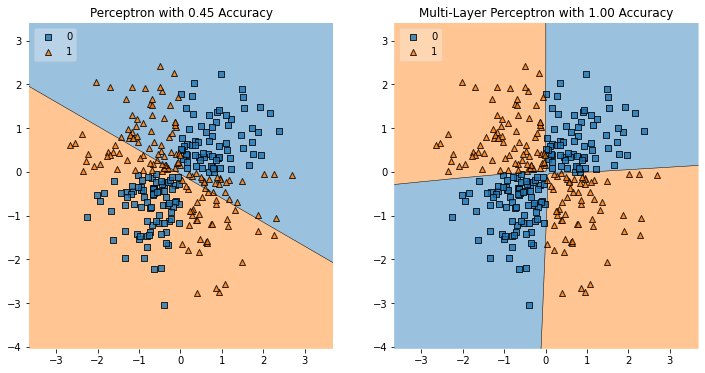

In [14]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

# 70%???? Cheez whizz I only got 47% from model1!!!!

# Anyway, the SLP performs much worse than the MLP because it is unable to learn or apply meta-linear decision boundaries to the dataset, which is clearly quadrant in its characteristic.

# The ability of the MLP to recognize meta-linear and multi-linear decision boundaries is useful for image classification because in natural images there are many lines... so many lines... lines all over the place... AND CURVES!... curves galore! Don't even get me started on all of the curves. Atop this there's the color dimension. Nauseating complexity. That's why meta-linear boundaries are needed.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- [x] Train your model and report its baseline accuracy.
- [x] Then hyperparameter tune at least two parameters and report your model's accuracy.
- [x] Use the Heart Disease Dataset (binary classification)
- [x] Use an appropriate loss function for a binary classification task
- [x] Use an appropriate activation function on the final layer of your network
- [x] Train your model using verbose output for ease of grading.
- [x] Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- [x] When hyperparameter tuning, show you work by adding code cells for each new experiment.
- [x] Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- [ ] You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0


In [16]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

# Dummy baseline: MUST.. BEAT... 55%!

In [0]:
from sklearn.model_selection import train_test_split

## Make sure these sets are in the right shape...

In [20]:
X = df.drop(columns='target')
y = df['target']
X.shape,y.shape

((303, 13), (303,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8
    )

In [38]:
y_train.shape

(242,)

## Target was indeed detected and lopped off the X sets

In [22]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3


## Scale and vectorize the data so it tastes better to the NN...

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std[:2])

[[ 1.53962979 -1.50674161  1.0212897  -0.66803275 -0.66975521 -0.44499416
  -1.01891157 -1.50786247 -0.69617712  0.46818543 -0.68117412 -0.74288354
  -0.47096058]
 [-0.57230869  0.6636838   1.0212897  -0.66803275 -1.11434167 -0.44499416
   0.89253495 -0.46016954 -0.69617712  0.91495543 -0.68117412  2.15675867
   1.11199026]]


In [39]:
X_train_std.shape

(242, 13)

## Validation set for an initial baseline of the net

In [0]:
X_train0, X_val, y_train0, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=8
    )

In [27]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model3 = Sequential([
      Dense(32,activation='relu', input_dim=13),
      Dense(64,activation='relu'),
      Dense(16,activation='relu'),
      Dense(4,activation='relu'),
      Dense(1,activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

result3 = model3.fit(
    X_train0,y_train0,
    validation_data=(X_val,y_val),
    epochs=100 #,callbacks=[stop]
    )

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 2.5368 - accuracy: 0.4870 - val_loss: 1.1002 - val_accuracy: 0.4286
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7974 - accuracy: 0.5751 - val_loss: 0.9665 - val_accuracy: 0.4286
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7219 - accuracy: 0.5699 - val_loss: 0.6893 - val_accuracy: 0.5306
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7527 - accuracy: 0.5751 - val_loss: 0.6386 - val_accuracy: 0.6327
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.6321 - val_loss: 0.7531 - val_accuracy: 0.4286
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6441 - accuracy: 0.5699 - val_loss: 0.8446 - val_accuracy: 0.4286
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7738 - accuracy: 0.5751 - val_loss: 0.7906 - val_accuracy: 0.4286
Epoch 8/100
7/7 [======

In [30]:
max(result3.history['val_accuracy'])

0.7551020383834839

## 75.51% accuracy. Baseline Net beats dummy baseline by 20%

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

## Hyperparameter tuning with GridSearchCV

In [50]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adadelta
np.random.seed(8)

def create_model(learning_rate=0.01, optimizer=Adam()):
  model = Sequential()
  model.add(Dense(32,activation='relu', input_dim=13))
  # model.add(Dense(32,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1,activation='relu'))
  optim = optimizer(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')
  return model

model4 = KerasClassifier(build_fn=create_model, verbose=0)

para_grid = {
    'batch_size': [8, 16, 32, 64], 'epochs': [20],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'optimizer': [Adam, SGD, Nadam, Adadelta],
    }

grid = GridSearchCV(estimator=model4, param_grid=para_grid, n_jobs=1)
grid_result = grid.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8060374140739441 using {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>}
Means: 0.7238945603370667, Stdev: 0.09917628670246556 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>}
Means: 0.7193877458572387, Stdev: 0.09600222082713292 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>}
Means: 0.8060374140739441, Stdev: 0.07005140016116233 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>}
Means: 0.44991496205329895, Stdev: 0.07468600550116017 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>}
Means: 0.5415816247463227, Stdev: 0.18662716242649874 with: {'batch_si

# This GridSearch CV alleges that Nadam is the best optimizer. It returns an accuracy of 80.604% at a learning rate of 0.001, and a batch size of 8. I will settle on Nadam and hone in on the batch sizes and learning rate from here.

In [51]:
def create_model(learning_rate=0.01, optimizer=Nadam()):
  model = Sequential()
  model.add(Dense(32,activation='relu', input_dim=13))
  # model.add(Dense(32,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1,activation='relu'))
  optim = Nadam(learning_rate=learning_rate)
  model.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')
  return model

model4 = KerasClassifier(build_fn=create_model, verbose=0)

para_grid = {
    'batch_size': [4, 8, 10, 12, 14], 'epochs': [20],
    'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01],
    }

grid = GridSearchCV(estimator=model4, param_grid=para_grid, n_jobs=1)
grid_result = grid.fit(X_train_std, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8059523820877075 using {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001}
Means: 0.6286564588546752, Stdev: 0.08252312425152392 with: {'batch_size': 4, 'epochs': 20, 'learning_rate': 0.0001}
Means: 0.7351190447807312, Stdev: 0.18555582743646312 with: {'batch_size': 4, 'epochs': 20, 'learning_rate': 0.0005}
Means: 0.7226190447807312, Stdev: 0.11608329578753646 with: {'batch_size': 4, 'epochs': 20, 'learning_rate': 0.001}
Means: 0.6957482933998108, Stdev: 0.16264421077784727 with: {'batch_size': 4, 'epochs': 20, 'learning_rate': 0.005}
Means: 0.5520408153533936, Stdev: 0.17389353611155559 with: {'batch_size': 4, 'epochs': 20, 'learning_rate': 0.01}
Means: 0.5207482933998108, Stdev: 0.10256998270991621 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.0001}
Means: 0.7687925219535827, Stdev: 0.041004905614769084 with: {'batch_size': 8, 'epochs': 20, 'learning_rate': 0.0005}
Means: 0.8059523820877075, Stdev: 0.04545989179140975 with: {'batch_size': 8, 'epochs': 20, 'lear

# Doesn't beat the last run with the same hyperparameters. Wonder why...

# 80.595% accuracy
#Optimizer = Nadam
#batch = 8
#learn rate = 0.001

## Anyway, here's for the final test accuracy...

In [53]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=16)

model4 = Sequential([
      Dense(32,activation='relu', input_dim=13),
      Dense(64,activation='relu'),
      Dense(16,activation='relu'),
      Dense(4,activation='relu'),
      Dense(1,activation='sigmoid')
])

optim = Nadam(learning_rate=0.001)

model4.compile(optimizer=optim, loss='binary_crossentropy', metrics='accuracy')

result4 = model3.fit(
    X_train,y_train, batch_size=8, 
    validation_data=(X_test,y_test),
    epochs=100 ,callbacks=[stop]
    )

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7066 - val_loss: 0.6108 - val_accuracy: 0.6393
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.6942 - val_loss: 0.6010 - val_accuracy: 0.7049
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.7314 - val_loss: 0.5979 - val_accuracy: 0.7213
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.7355 - val_loss: 0.5978 - val_accuracy: 0.7049
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6818 - val_loss: 0.6159 - val_accuracy: 0.6393
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6860 - val_loss: 0.5998 - val_accuracy: 0.6885
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5839 - accuracy: 0.7149 - val_loss: 0.6356 - val_accuracy: 0.6557
Epoch 8/100
3

# 73% test accuracy after 17 epochs using Nadam optimizer, learning rate of 0.001, batch size of 8.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- [ ] Train your model and report its baseline accuracy.
- [ ] Then hyperparameter tune at least two parameters and report your model's accuracy.
- [ ] Use the Heart Disease Dataset (binary classification)
- [ ] Use an appropriate loss function for a binary classification task
- [ ] Use an appropriate activation function on the final layer of your network
- [ ] Train your model using verbose output for ease of grading.
- [ ] Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- [ ] When hyperparameter tuning, show you work by adding code cells for each new experiment.
- [ ] Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- [ ] You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.